<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (3)

1) 다음 요구사항에 맞게 하나의 코드셀에 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 air 데이터프레임을 만드세요.

    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'

In [2]:
import pandas as pd

path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'

air = pd.read_csv(path)

2) 상위 5개 행을 확인하세요.

In [4]:
air.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


3) 각 열에 결측치가 얼마나 있는지 확인하세요.

In [8]:
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) Month, Day 열을 한 번에 삭제하세요.
- 4-2) Ozone, Solar.R 두 열 결측치를 바로 앞의 값으로 채우세요.
- 4-3) 각 열에 결측치가 남아있는지 확인하세요.

In [15]:
#4-1
drop_cols = ['Month','Day']
air.drop(columns = drop_cols , inplace = True)
#4-2
air['Ozone']=air['Ozone'].fillna(method = 'ffill')
air['Solar.R']=air['Solar.R'].fillna(method = 'ffill')

#4-3
air.isnull().sum()


C:\Users\User\AppData\Local\Temp\ipykernel_13172\2790943001.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air['Ozone']=air['Ozone'].fillna(method = 'ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_13172\2790943001.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air['Solar.R']=air['Solar.R'].fillna(method = 'ffill')


Ozone      0
Solar.R    0
Wind       0
Temp       0
dtype: int64

5) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 5-1) 기술통계 정보에서 Temp 열의 25%, 50%, 75% 값을 조회해 q1, q2, q3 변수를 선언하세요.
- 5-2) 아래 범위와 값을 참조해 'a' ~ 'd' 값을 갖는 TempGrp 열을 추가하세요.
    - q1 이하 → 'a'
    - q1 초과 q2 이하 → 'b'
    - q2 초과 q3 이하 → 'c'
    - q3 초과 → 'd'
- 5-3) TempGrp 별 Ozone 평균을 집계하여 tmp 데이터프레임을 선언하세요.
- 5-4) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

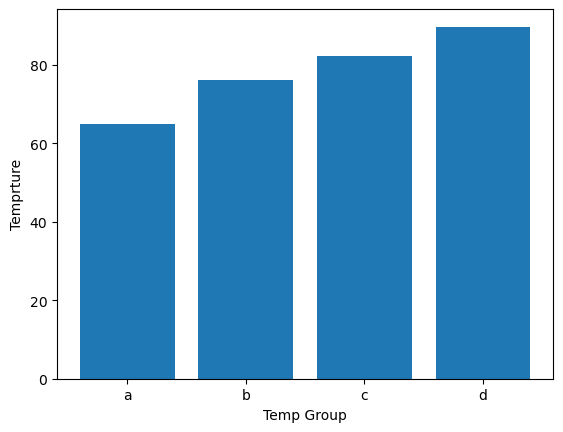

In [25]:
import numpy as np
# 5-1

air['Temp'].describe()
q1= air['Temp'].describe()['25%']
q2= air['Temp'].describe()['50%']
q3= air['Temp'].describe()['75%']

#5-2
bin = [-np.inf,q1,q2,q3,np.inf]
label = list('abcd')
air['TempGrp'] = pd.cut(air['Temp'], bins =bin , labels =label )

# 5-3 
tmp =air.groupby(by = 'TempGrp' , as_index = False, observed = False )['Temp'].mean()
# observed = False   그룹화 할 경우 그룹퍼에 의해 관찰된 값만 표시할지 여부
# observed = True: 관찰된 값 들만 표기 / observed = False 관찰되지 않은 값들도 표기   (ex NaN 도 표기 )

# 5-4 
import matplotlib.pyplot as plt

plt.bar(x=tmp['TempGrp'], height= tmp['Temp'])
plt.xlabel('Temp Group')
plt.ylabel('Temprture')
plt.show()

In [28]:
tmp

,TempGrp,Temp
0,a,64.948718
1,b,76.243902
2,c,82.205128
3,d,89.735294
